In [1]:
%load_ext autoreload
%autoreload 2

# Set Trial Name

In [2]:
TRIAL_NAME = "7_target_encoding"

import datetime
import pytz
NOW = datetime.datetime.now(pytz.timezone('Asia/Tokyo')).strftime('%Y%m%d%H%M%S')

# Load yaml

In [3]:
import yaml
CONFIG_DIR = '../config'
with open(f'{CONFIG_DIR}/run000.yml') as file:
    cfg = yaml.safe_load(file)

import sys
sys.path.append(cfg['SRC_DIR'])
cfg['run_name'] = TRIAL_NAME

# fix seed

In [4]:
from util import seed_everything
seed_everything(seed=33, use_torch=False)

# Make Output Folder

In [5]:
import os
OUTPUT_DIR = f'../../output/{NOW}_{TRIAL_NAME}'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Load Model

In [6]:
import pandas as pd
import numpy as np

sub = pd.read_csv('../../data/atmacup10__sample_submission.csv')
color = pd.read_csv('../../data/color.csv')
historical_person = pd.read_csv('../../data/historical_person.csv')
maker = pd.read_csv('../../data/maker.csv')
material = pd.read_csv('../../data/material.csv')
object_collection = pd.read_csv('../../data/object_collection.csv')
palette = pd.read_csv('../../data/palette.csv')
principal_maker_occupation = pd.read_csv('../../data/principal_maker_occupation.csv')
principal_maker = pd.read_csv('../../data/principal_maker.csv')
production_place = pd.read_csv('../../data/production_place.csv')
technique = pd.read_csv('../../data/technique.csv')
test = pd.read_csv('../../data/test.csv')
test[cfg['target']] = np.nan
train = pd.read_csv('../../data/train.csv')

In [7]:
train.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,0011d6be41612ec9eae3,93c092ba70beab248f31,The Avenue of Birches,NaN,"The Avenue of Birches, Jan Hackaert, 1660 - 1685",Jan Hackaert,Jan Hackaert,h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm,NaN,The Avenue of Birches,purchase,1808-01-01T00:00:00,NaN,1660 - 1685,1660.0,17,1660.0,1685.0,48
1,0012765f7a97ccc3e9e9,95c14fb11c54281ad7e0,Struik in bloei,NaN,"Struik in bloei, Richard Tepe (attributed to),...",Richard Tepe,Richard Tepe,h 165mm × w 223mm,erven Richard Tepe,Struik in bloei,purchase,2000-01-01T00:00:00,NaN,c. 1900 - c. 1930,1900.0,19,1900.0,1930.0,2


In [8]:
test.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,000405d9a5e3f49fc49d,a2aabd3cc8859f4260ad,Twee personen voor de Duizendjarige den te Wol...,NaN,Twee personen voor de Duizendjarige den te Wol...,Bernardus Bruining,Bernardus Bruining,h 167mm × w 108mm,NaN,Twee personen voor de Duizendjarige den te Wol...,transfer,1994-01-01T00:00:00,NaN,1850 - 1900,1850.0,19,1850.0,1900.0,NaN
1,001020bd00b149970f78,5d6a286cc3ab64c2c043,"Portrait of Philipp Ernst, Count of Hohenlohe ...","Portret van Philip Ernst (1585-1629), graaf va...","Portrait of Philipp Ernst, Count of Hohenlohe ...",Jan Antonisz van Ravesteyn,Jan Antonisz van Ravesteyn,h 29.7cm × w 24.1cm,NaN,"Portrait of Philipp Ernst, Count of Hohenlohe ...",nationalization 1795,1798-09-01T00:00:00,NaN,c. 1609 - c. 1633,1609.0,17,1609.0,1633.0,NaN


In [9]:
del_non_overlapping_list = [
    # 'object_id',
    'art_series_id',
    #'title',
    #'description',
    #'long_title',
    'principal_maker',
    'principal_or_first_maker',
    #'sub_title',
    'copyright_holder',
    #'more_title',
    'acquisition_method',
    # 'acquisition_date',
    # 'acquisition_credit_line',
    # 'dating_presenting_date',
    # 'dating_sorting_date',
    'dating_period',
    # 'dating_year_early',
    # 'dating_year_late'
]

from util import replace_non_overlap_val_to_missing
train, test = replace_non_overlap_val_to_missing(train,test,columns=del_non_overlapping_list)

In [10]:
train.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,0011d6be41612ec9eae3,other,The Avenue of Birches,NaN,"The Avenue of Birches, Jan Hackaert, 1660 - 1685",Jan Hackaert,Jan Hackaert,h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm,missing,The Avenue of Birches,purchase,1808-01-01T00:00:00,NaN,1660 - 1685,1660.0,17,1660.0,1685.0,48
1,0012765f7a97ccc3e9e9,other,Struik in bloei,NaN,"Struik in bloei, Richard Tepe (attributed to),...",Richard Tepe,Richard Tepe,h 165mm × w 223mm,erven Richard Tepe,Struik in bloei,purchase,2000-01-01T00:00:00,NaN,c. 1900 - c. 1930,1900.0,19,1900.0,1930.0,2


In [11]:
test.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,000405d9a5e3f49fc49d,other,Twee personen voor de Duizendjarige den te Wol...,NaN,Twee personen voor de Duizendjarige den te Wol...,Bernardus Bruining,Bernardus Bruining,h 167mm × w 108mm,missing,Twee personen voor de Duizendjarige den te Wol...,transfer,1994-01-01T00:00:00,NaN,1850 - 1900,1850.0,19,1850.0,1900.0,NaN
1,001020bd00b149970f78,other,"Portrait of Philipp Ernst, Count of Hohenlohe ...","Portret van Philip Ernst (1585-1629), graaf va...","Portrait of Philipp Ernst, Count of Hohenlohe ...",Jan Antonisz van Ravesteyn,Jan Antonisz van Ravesteyn,h 29.7cm × w 24.1cm,missing,"Portrait of Philipp Ernst, Count of Hohenlohe ...",nationalization 1795,1798-09-01T00:00:00,NaN,c. 1609 - c. 1633,1609.0,17,1609.0,1633.0,NaN


# Merge Data

In [12]:
group = train.groupby('principal_maker')

agg_df = pd.concat([
    group.size().rename('size'), # 著者が何回出てくるか. (value_counts と同じです)
    group['sub_title'].nunique().rename('sub_title_num'), # 著者ごとに何種類の sub_title を持っているか
    group['dating_sorting_date'].agg(['min', 'max', 'mean']), # 著者ごとに描いた年度の最小・最大・平均 (agg に配列を渡すと同時に複数やってくれます)
], axis=1)

agg_df.head()

,size,sub_title_num,min,max,mean
principal_maker,,,,,
A. Böeseken,5,5,1858.0,1873.0,1865.8
A. Lutz,1,1,1825.0,1825.0,1825.0
A. Mansuy,2,2,1860.0,1860.0,1860.0
A. Nissen,3,1,1860.0,1860.0,1860.0
A. Roussel,1,1,1905.0,1905.0,1905.0


In [13]:
train = pd.merge(train, 
         agg_df,
         on='principal_maker', 
         how='left')

test = pd.merge(test, 
         agg_df,
         on='principal_maker', 
         how='left')

In [14]:
train.columns

Index(['object_id', 'art_series_id', 'title', 'description', 'long_title',
       'principal_maker', 'principal_or_first_maker', 'sub_title',
       'copyright_holder', 'more_title', 'acquisition_method',
       'acquisition_date', 'acquisition_credit_line', 'dating_presenting_date',
       'dating_sorting_date', 'dating_period', 'dating_year_early',
       'dating_year_late', 'likes', 'size', 'sub_title_num', 'min', 'max',
       'mean'],
      dtype='object')

# Feature Enginnering

In [15]:
def create_object_feature(input_df):        
    return input_df['likes'].copy()

create_object_feature(test).head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: likes, dtype: float64

In [16]:
def create_numeric_feature(input_df):
    use_columns = [
        'dating_period',
        'dating_year_early',
        'dating_year_late'
    ]

    return input_df[use_columns].copy()

create_numeric_feature(train).head(2)

,dating_period,dating_year_early,dating_year_late
0,17,1660.0,1685.0
1,19,1900.0,1930.0


In [17]:
def create_categorical_feature(input_df):
    use_columns = [
    'art_series_id',
    'principal_maker',
    'principal_or_first_maker',
    'copyright_holder',
    'acquisition_method',
    ]

    return input_df[use_columns].copy()

create_categorical_feature(train).head(2)

,art_series_id,principal_maker,principal_or_first_maker,copyright_holder,acquisition_method
0,other,Jan Hackaert,Jan Hackaert,missing,purchase
1,other,Richard Tepe,Richard Tepe,erven Richard Tepe,purchase


In [18]:
import datetime

def create_acquisition_feature(input_df):
    out_df = pd.DataFrame()
    
    use_columns = [
        'acquisition_date'
    ]
    
    out_df['year'] = pd.to_datetime(input_df['acquisition_date']).dt.year
    out_df['month'] = pd.to_datetime(input_df['acquisition_date']).dt.month
    out_df['dayofweek'] = pd.to_datetime(input_df['acquisition_date']).dt.dayofweek
    out_df['sum_time'] =  10**10 - pd.to_datetime(input_df['acquisition_date']).view('int') // 10**9
    
    return out_df.add_prefix('AcquisitionDate_')

create_acquisition_feature(train).head(2)

,AcquisitionDate_year,AcquisitionDate_month,AcquisitionDate_dayofweek,AcquisitionDate_sum_time
0,1808.0,1.0,4.0,15112288000
1,2000.0,1.0,5.0,9053315200


In [19]:
# from util import inf2nan

# def create_principal_maker_info_feature(input_df):
#     '''作者の情報を追加'''
#     out_df = pd.DataFrame()

#     input_df_object_id = input_df['object_id']
    
#     # 作成期間の平均の年を作成
#     train['dating_year_mean'] = (train['dating_year_early'] + train['dating_year_late']) / 2
#     test['dating_year_mean'] = (test['dating_year_early'] + test['dating_year_late']) / 2

#     merge_df = pd.concat([train, test],axis=0).reset_index(drop=True)

#     # 作成期間の平均までに稼いだ良いねの総数、作者の人気度指数
#     out_df['object_id'] = merge_df['object_id']
#     out_df['principal_maker'] = merge_df['principal_maker']
#     out_df['dating_year_mean'] = merge_df['dating_year_mean']
#     out_df['cumsum'] = merge_df.sort_values('dating_year_mean').groupby('principal_maker')['likes'].cumsum()
#     out_df['cumsum_fillnan'] = out_df.sort_values('dating_year_mean').groupby('principal_maker')['cumsum'].ffill()

#     # 作成期間の平均までに出した作品の数
#     tmp_df = pd.DataFrame()
#     tmp_df['object_id'] = train['object_id']
#     tmp_df['cumcount'] = train.sort_values('dating_year_mean').groupby('principal_maker').cumcount()
#     out_df = pd.merge(out_df, tmp_df, on='object_id', how='left')
#     out_df['cumcount_fillnan'] = out_df.sort_values('dating_year_mean').groupby('principal_maker')['cumcount'].ffill()

#     # 作成期間の平均における良いねの作品平均、作者の人気度指数
#     out_df['cumsum_per_cumcount'] = out_df['cumsum_fillnan'] / out_df['cumcount_fillnan']
#     out_df['cumsum_per_cumcount'] = inf2nan(out_df['cumsum_per_cumcount'])
    
#     # anonymousはnanにする
#     anonymous_idx = out_df[out_df['principal_maker'] == 'anonymous'].index
#     out_df.loc[anonymous_idx,['cumsum_fillnan','cumcount_fillnan','cumsum_per_cumcount']] = np.nan
    
#     # filter by id
#     out_df = out_df[out_df['object_id'].isin(input_df_object_id)].reset_index(drop=True)

#     return out_df[['cumsum_fillnan','cumcount_fillnan','cumsum_per_cumcount']].add_prefix('PrincipalMakerInfo_')

# create_principal_maker_info_feature(train).head(2)

In [20]:
def create_string_length_feature(input_df):
    out_df = pd.DataFrame()

    str_columns = [
        'title', 
        'long_title',
        'sub_title',
        'more_title'
        # and more
    ]

    for c in str_columns:
        out_df[c] = input_df[c].str.len()

    return out_df.add_prefix('StringLength__')

create_string_length_feature(train).head(2)

,StringLength__title,StringLength__long_title,StringLength__sub_title,StringLength__more_title
0,21,48,39.0,21.0
1,15,64,17.0,15.0


In [21]:
def create_count_encoding_feature(input_df):
    use_columns = [
        'acquisition_method',
        'title',
        'principal_maker',
        # and more
    ]

    out_df = pd.DataFrame()
    for column in use_columns:
        vc = train[column].value_counts()
        out_df[column] = input_df[column].map(vc)

    return out_df.add_prefix('CE_')

create_count_encoding_feature(train).head(2)

,CE_acquisition_method,CE_title,CE_principal_maker
0,4253,1,3
1,4253,1,180


In [22]:
def create_one_hot_encoding(input_df):
    use_columns = [
        'acquisition_method',
        'principal_maker'
    ]
    out_df = pd.DataFrame()
    for column in use_columns:

        # あまり巨大な行列にならないよう, 出現回数が 20 回を下回るカテゴリは考慮しない
        vc = train[column].value_counts()
        vc = vc[vc > 20]

        # 明示的に catgories を指定して, input_df によらず列の大きさが等しくなるようにする
        cat = pd.Categorical(input_df[column], categories=vc.index)

        # このタイミングで one-hot 化
        out_i = pd.get_dummies(cat)
        # column が Catgory 型として認識されているので list にして解除する (こうしないと concat でエラーになる)
        out_i.columns = out_i.columns.tolist()
        out_i = out_i.add_prefix(f'{column}=')
        out_df = pd.concat([out_df, out_i], axis=1)
    return out_df

create_one_hot_encoding(train).head(2)

,acquisition_method=purchase,acquisition_method=transfer,acquisition_method=gift,acquisition_method=unknown,acquisition_method=bequest,acquisition_method=loan,acquisition_method=missing,acquisition_method=nationalization 1795,principal_maker=anonymous,principal_maker=other,...,principal_maker=James Valentine,principal_maker=Rembrandt van Rijn,principal_maker=Jan Banning,principal_maker=Cor Jaring,principal_maker=Wouter Johannes van Troostwijk,principal_maker=Jan Maurits Quinkhard,principal_maker=Adolphe Zimmermans,principal_maker=Jean Baptiste August Kessler,principal_maker=Augusta Curiel,principal_maker=Gerard Edelinck
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# https://github.com/nyk510/vivid/blob/master/vivid/utils.py
from contextlib import contextmanager
from time import time

class Timer:
    def __init__(self, logger=None, format_str='{:.3f}[s]', prefix=None, suffix=None, sep=' '):

        if prefix: format_str = str(prefix) + sep + format_str
        if suffix: format_str = format_str + sep + str(suffix)
        self.format_str = format_str
        self.logger = logger
        self.start = None
        self.end = None

    @property
    def duration(self):
        if self.end is None:
            return 0
        return self.end - self.start

    def __enter__(self):
        self.start = time()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time()
        out_str = self.format_str.format(self.duration)
        if self.logger:
            self.logger.info(out_str)
        else:
            print(out_str)

In [24]:
from tqdm import tqdm

def to_feature(input_df):
    """input_df を特徴量行列に変換した新しいデータフレームを返す.
    """

    processors = [
        create_object_feature,
        create_numeric_feature,
        create_categorical_feature,
        create_acquisition_feature,
        # create_principal_maker_info_feature,
        create_string_length_feature,
        create_count_encoding_feature,
        create_one_hot_encoding
    ]

    out_df = pd.DataFrame()

    for func in tqdm(processors, total=len(processors)):
        with Timer(prefix='create' + func.__name__ + ' '):
            _df = func(input_df)
        # 長さが等しいことをチェック (ずれている場合, func の実装がおかしい)
        assert len(_df) == len(input_df), func.__name__
        out_df = pd.concat([out_df, _df], axis=1)

    return out_df

train_feat= to_feature(train)
test_feat = to_feature(test)

train = train_feat.copy()
test = test_feat.copy()

100%|██████████| 7/7 [00:00<00:00, 85.37it/s]

createcreate_object_feature  0.001[s]
createcreate_numeric_feature  0.001[s]
createcreate_categorical_feature  0.002[s]
createcreate_acquisition_feature  0.017[s]
createcreate_string_length_feature  0.017[s]
createcreate_count_encoding_feature  0.012[s]
createcreate_one_hot_encoding  0.010[s]
createcreate_object_feature  0.000[s]
createcreate_numeric_feature  0.002[s]
createcreate_categorical_feature  0.001[s]
createcreate_acquisition_feature  0.013[s]
createcreate_string_length_feature  0.018[s]
createcreate_count_encoding_feature  0.013[s]
createcreate_one_hot_encoding  0.010[s]


In [25]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

# train

In [26]:
train.head(2)

,likes,dating_period,dating_year_early,dating_year_late,art_series_id,principal_maker,principal_or_first_maker,copyright_holder,acquisition_method,AcquisitionDate_year,...,principal_maker=James Valentine,principal_maker=Rembrandt van Rijn,principal_maker=Jan Banning,principal_maker=Cor Jaring,principal_maker=Wouter Johannes van Troostwijk,principal_maker=Jan Maurits Quinkhard,principal_maker=Adolphe Zimmermans,principal_maker=Jean Baptiste August Kessler,principal_maker=Augusta Curiel,principal_maker=Gerard Edelinck
0,48,17,1660.0,1685.0,other,Jan Hackaert,Jan Hackaert,missing,purchase,1808.0,...,0,0,0,0,0,0,0,0,0,0
1,2,19,1900.0,1930.0,other,Richard Tepe,Richard Tepe,erven Richard Tepe,purchase,2000.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
test.head(2)

,likes,dating_period,dating_year_early,dating_year_late,art_series_id,principal_maker,principal_or_first_maker,copyright_holder,acquisition_method,AcquisitionDate_year,...,principal_maker=James Valentine,principal_maker=Rembrandt van Rijn,principal_maker=Jan Banning,principal_maker=Cor Jaring,principal_maker=Wouter Johannes van Troostwijk,principal_maker=Jan Maurits Quinkhard,principal_maker=Adolphe Zimmermans,principal_maker=Jean Baptiste August Kessler,principal_maker=Augusta Curiel,principal_maker=Gerard Edelinck
0,NaN,19,1850.0,1900.0,other,Bernardus Bruining,Bernardus Bruining,missing,transfer,1994.0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,17,1609.0,1633.0,other,Jan Antonisz van Ravesteyn,Jan Antonisz van Ravesteyn,missing,nationalization 1795,1798.0,...,0,0,0,0,0,0,0,0,0,0


# reduce mem usage

In [28]:
# from util import reduce_mem_usage
# train_feat_df = reduce_mem_usage(train_feat_df)
# test_feat_df = reduce_mem_usage(test_feat_df)

# Lable Encoding

In [29]:
cat_col = train.select_dtypes('O').columns.tolist()

In [30]:
from fe import label_encode
train, test = label_encode(train, test, cat_col)

In [31]:
train.dtypes

likes                                             int64
dating_period                                     int64
dating_year_early                               float64
dating_year_late                                float64
art_series_id                                     int64
                                                 ...   
principal_maker=Jan Maurits Quinkhard             uint8
principal_maker=Adolphe Zimmermans                uint8
principal_maker=Jean Baptiste August Kessler      uint8
principal_maker=Augusta Curiel                    uint8
principal_maker=Gerard Edelinck                   uint8
Length: 118, dtype: object

# add fold

In [32]:
from fold import add_fold_bin_skf
train = add_fold_bin_skf(train, train[cfg['target']], fold_num=5, bins=[0,1,10,100,1000, 27392])

# Target Encoding

In [33]:
train['dating_period']

0        17
1        19
2        19
3        19
4        19
         ..
12021    19
12022    18
12023    18
12024    17
12025    15
Name: dating_period, Length: 12026, dtype: int64

In [34]:
target_enc_list = [
    # 'art_series_id',
    'principal_maker',
    'principal_or_first_maker',
    'copyright_holder',
    'acquisition_method',
    'dating_period'
]

from fe import target_encoding
train, test = target_encoding(train, 
                              test, 
                              target = cfg['target'], 
                              target_enc_list = target_enc_list, 
                              fold_num = cfg['fold_num']
                             )

principal_maker
principal_maker
0         1.800000
1         3.000000
2        19.500000
3         1.000000
4        75.000000
           ...    
1201      1.000000
1202    160.020210
1203     50.066667
1204      2.250000
1205      3.777778
Name: target, Length: 1206, dtype: float64
principal_or_first_maker
principal_or_first_maker
0         1.800000
1         3.000000
2        19.500000
3         1.000000
4        75.000000
           ...    
1211      0.000000
1212    162.195716
1213     50.066667
1214      2.250000
1215      3.777778
Name: target, Length: 1216, dtype: float64
copyright_holder
copyright_holder
0       0.000000
1      16.000000
2       2.083333
3       5.000000
4       9.777778
5      45.528846
6      12.727273
7       3.384615
8       2.516129
9       6.000000
10      4.000000
11      3.363636
12      3.500000
13      2.700000
14      0.000000
15      2.500000
16      4.481013
17     51.000000
18      2.838095
19      6.500000
20     10.000000
21      3.636364
22    

# Make Model

In [35]:
use_col = train.columns.tolist()
use_col.remove('fold')
use_col.remove(cfg['target'])

In [36]:
use_col

['dating_period',
 'dating_year_early',
 'dating_year_late',
 'art_series_id',
 'principal_maker',
 'principal_or_first_maker',
 'copyright_holder',
 'acquisition_method',
 'AcquisitionDate_year',
 'AcquisitionDate_month',
 'AcquisitionDate_dayofweek',
 'AcquisitionDate_sum_time',
 'StringLength__title',
 'StringLength__long_title',
 'StringLength__sub_title',
 'StringLength__more_title',
 'CE_acquisition_method',
 'CE_title',
 'CE_principal_maker',
 'acquisition_method=purchase',
 'acquisition_method=transfer',
 'acquisition_method=gift',
 'acquisition_method=unknown',
 'acquisition_method=bequest',
 'acquisition_method=loan',
 'acquisition_method=missing',
 'acquisition_method=nationalization 1795',
 'principal_maker=anonymous',
 'principal_maker=other',
 'principal_maker=Johann Sadeler (I)',
 'principal_maker=Bernard Picart',
 'principal_maker=Richard Tepe',
 'principal_maker=anoniem (Monumentenzorg)',
 'principal_maker=Jan Luyken',
 'principal_maker=Raphaël Sadeler (I)',
 'principa

In [37]:
# 学習直前でwandbにログイン、こうしないと頻繁にnotebookが落ちる
from use_wandb import use_wandb
use_wandb(params=cfg['params'], PROJECT_NAME=cfg['competition_name'], TRIAL_NAME=TRIAL_NAME)

wandb: Currently logged in as: sinchir0 (use `wandb login --relogin` to force relogin)


--------------FOLDS : 0 --------------
Training until validation scores don't improve for 100 rounds


/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'principal_maker', 'principal_or_first_maker']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters fr

[100]	training's rmse: 1.25457	valid_1's rmse: 1.27448
[200]	training's rmse: 1.12173	valid_1's rmse: 1.16369
[300]	training's rmse: 1.07525	valid_1's rmse: 1.13588
[400]	training's rmse: 1.04736	valid_1's rmse: 1.1269
[500]	training's rmse: 1.02646	valid_1's rmse: 1.12178
[600]	training's rmse: 1.00889	valid_1's rmse: 1.11816
[700]	training's rmse: 0.992871	valid_1's rmse: 1.11473
[800]	training's rmse: 0.978432	valid_1's rmse: 1.11328
[900]	training's rmse: 0.964983	valid_1's rmse: 1.11065
[1000]	training's rmse: 0.952129	valid_1's rmse: 1.10874
[1100]	training's rmse: 0.939469	valid_1's rmse: 1.10697
[1200]	training's rmse: 0.927382	valid_1's rmse: 1.1061
[1300]	training's rmse: 0.915819	valid_1's rmse: 1.10482
[1400]	training's rmse: 0.905134	valid_1's rmse: 1.10377
[1500]	training's rmse: 0.894653	valid_1's rmse: 1.10257
[1600]	training's rmse: 0.884859	valid_1's rmse: 1.10164
[1700]	training's rmse: 0.875107	valid_1's rmse: 1.10058
[1800]	training's rmse: 0.865498	valid_1's rmse:

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'principal_maker', 'principal_or_first_maker']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters fr

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.25088	valid_1's rmse: 1.27716
[200]	training's rmse: 1.11654	valid_1's rmse: 1.17186
[300]	training's rmse: 1.0704	valid_1's rmse: 1.15013
[400]	training's rmse: 1.04262	valid_1's rmse: 1.14242
[500]	training's rmse: 1.02188	valid_1's rmse: 1.13707
[600]	training's rmse: 1.00381	valid_1's rmse: 1.13304
[700]	training's rmse: 0.987758	valid_1's rmse: 1.13092
[800]	training's rmse: 0.97303	valid_1's rmse: 1.12869
[900]	training's rmse: 0.959417	valid_1's rmse: 1.12702
[1000]	training's rmse: 0.9465	valid_1's rmse: 1.12619
[1100]	training's rmse: 0.934104	valid_1's rmse: 1.12443
[1200]	training's rmse: 0.922839	valid_1's rmse: 1.12266
[1300]	training's rmse: 0.911351	valid_1's rmse: 1.12192
[1400]	training's rmse: 0.900597	valid_1's rmse: 1.12083
[1500]	training's rmse: 0.889907	valid_1's rmse: 1.11978
[1600]	training's rmse: 0.879839	valid_1's rmse: 1.11866
[1700]	training's rmse: 0.87003	valid_1's rms

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'principal_maker', 'principal_or_first_maker']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters fr

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.25623	valid_1's rmse: 1.26461
[200]	training's rmse: 1.12469	valid_1's rmse: 1.15379
[300]	training's rmse: 1.07865	valid_1's rmse: 1.12966
[400]	training's rmse: 1.05116	valid_1's rmse: 1.12044
[500]	training's rmse: 1.03055	valid_1's rmse: 1.11531
[600]	training's rmse: 1.01278	valid_1's rmse: 1.1118
[700]	training's rmse: 0.996802	valid_1's rmse: 1.1084
[800]	training's rmse: 0.981748	valid_1's rmse: 1.10628
[900]	training's rmse: 0.968166	valid_1's rmse: 1.10565
[1000]	training's rmse: 0.954915	valid_1's rmse: 1.10416
[1100]	training's rmse: 0.942281	valid_1's rmse: 1.10288
[1200]	training's rmse: 0.930558	valid_1's rmse: 1.10187
[1300]	training's rmse: 0.91893	valid_1's rmse: 1.10023
[1400]	training's rmse: 0.908487	valid_1's rmse: 1.09974
[1500]	training's rmse: 0.89792	valid_1's rmse: 1.09907
[1600]	training's rmse: 0.887518	valid_1's rmse: 1.09812
[1700]	training's rmse: 0.877617	valid_1's rm

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'principal_maker', 'principal_or_first_maker']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters fr

[100]	training's rmse: 1.25079	valid_1's rmse: 1.34183
[200]	training's rmse: 1.11736	valid_1's rmse: 1.24955
[300]	training's rmse: 1.06991	valid_1's rmse: 1.22206
[400]	training's rmse: 1.04219	valid_1's rmse: 1.21136
[500]	training's rmse: 1.02085	valid_1's rmse: 1.20494
[600]	training's rmse: 1.00258	valid_1's rmse: 1.20133
[700]	training's rmse: 0.986744	valid_1's rmse: 1.19883
[800]	training's rmse: 0.971179	valid_1's rmse: 1.19582
[900]	training's rmse: 0.95728	valid_1's rmse: 1.19418
[1000]	training's rmse: 0.944185	valid_1's rmse: 1.1944
[1100]	training's rmse: 0.931398	valid_1's rmse: 1.1926
[1200]	training's rmse: 0.919788	valid_1's rmse: 1.1918
[1300]	training's rmse: 0.90786	valid_1's rmse: 1.19101
[1400]	training's rmse: 0.89727	valid_1's rmse: 1.19028
[1500]	training's rmse: 0.886751	valid_1's rmse: 1.18963
[1600]	training's rmse: 0.87658	valid_1's rmse: 1.1892
[1700]	training's rmse: 0.866639	valid_1's rmse: 1.19006
Early stopping, best iteration is:
[1610]	training's r

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'principal_maker', 'principal_or_first_maker']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters fr

[100]	training's rmse: 1.25332	valid_1's rmse: 1.28595
[200]	training's rmse: 1.12106	valid_1's rmse: 1.17502
[300]	training's rmse: 1.07439	valid_1's rmse: 1.14782
[400]	training's rmse: 1.04665	valid_1's rmse: 1.13657
[500]	training's rmse: 1.02524	valid_1's rmse: 1.13125
[600]	training's rmse: 1.00727	valid_1's rmse: 1.12785
[700]	training's rmse: 0.990601	valid_1's rmse: 1.12512
[800]	training's rmse: 0.9755	valid_1's rmse: 1.1227
[900]	training's rmse: 0.961345	valid_1's rmse: 1.12097
[1000]	training's rmse: 0.948126	valid_1's rmse: 1.1194
[1100]	training's rmse: 0.935566	valid_1's rmse: 1.11737
[1200]	training's rmse: 0.924353	valid_1's rmse: 1.11668
[1300]	training's rmse: 0.912961	valid_1's rmse: 1.11564
[1400]	training's rmse: 0.901934	valid_1's rmse: 1.11483
[1500]	training's rmse: 0.89127	valid_1's rmse: 1.11448
[1600]	training's rmse: 0.881124	valid_1's rmse: 1.11431
[1700]	training's rmse: 0.871572	valid_1's rmse: 1.11411
[1800]	training's rmse: 0.861822	valid_1's rmse: 1.

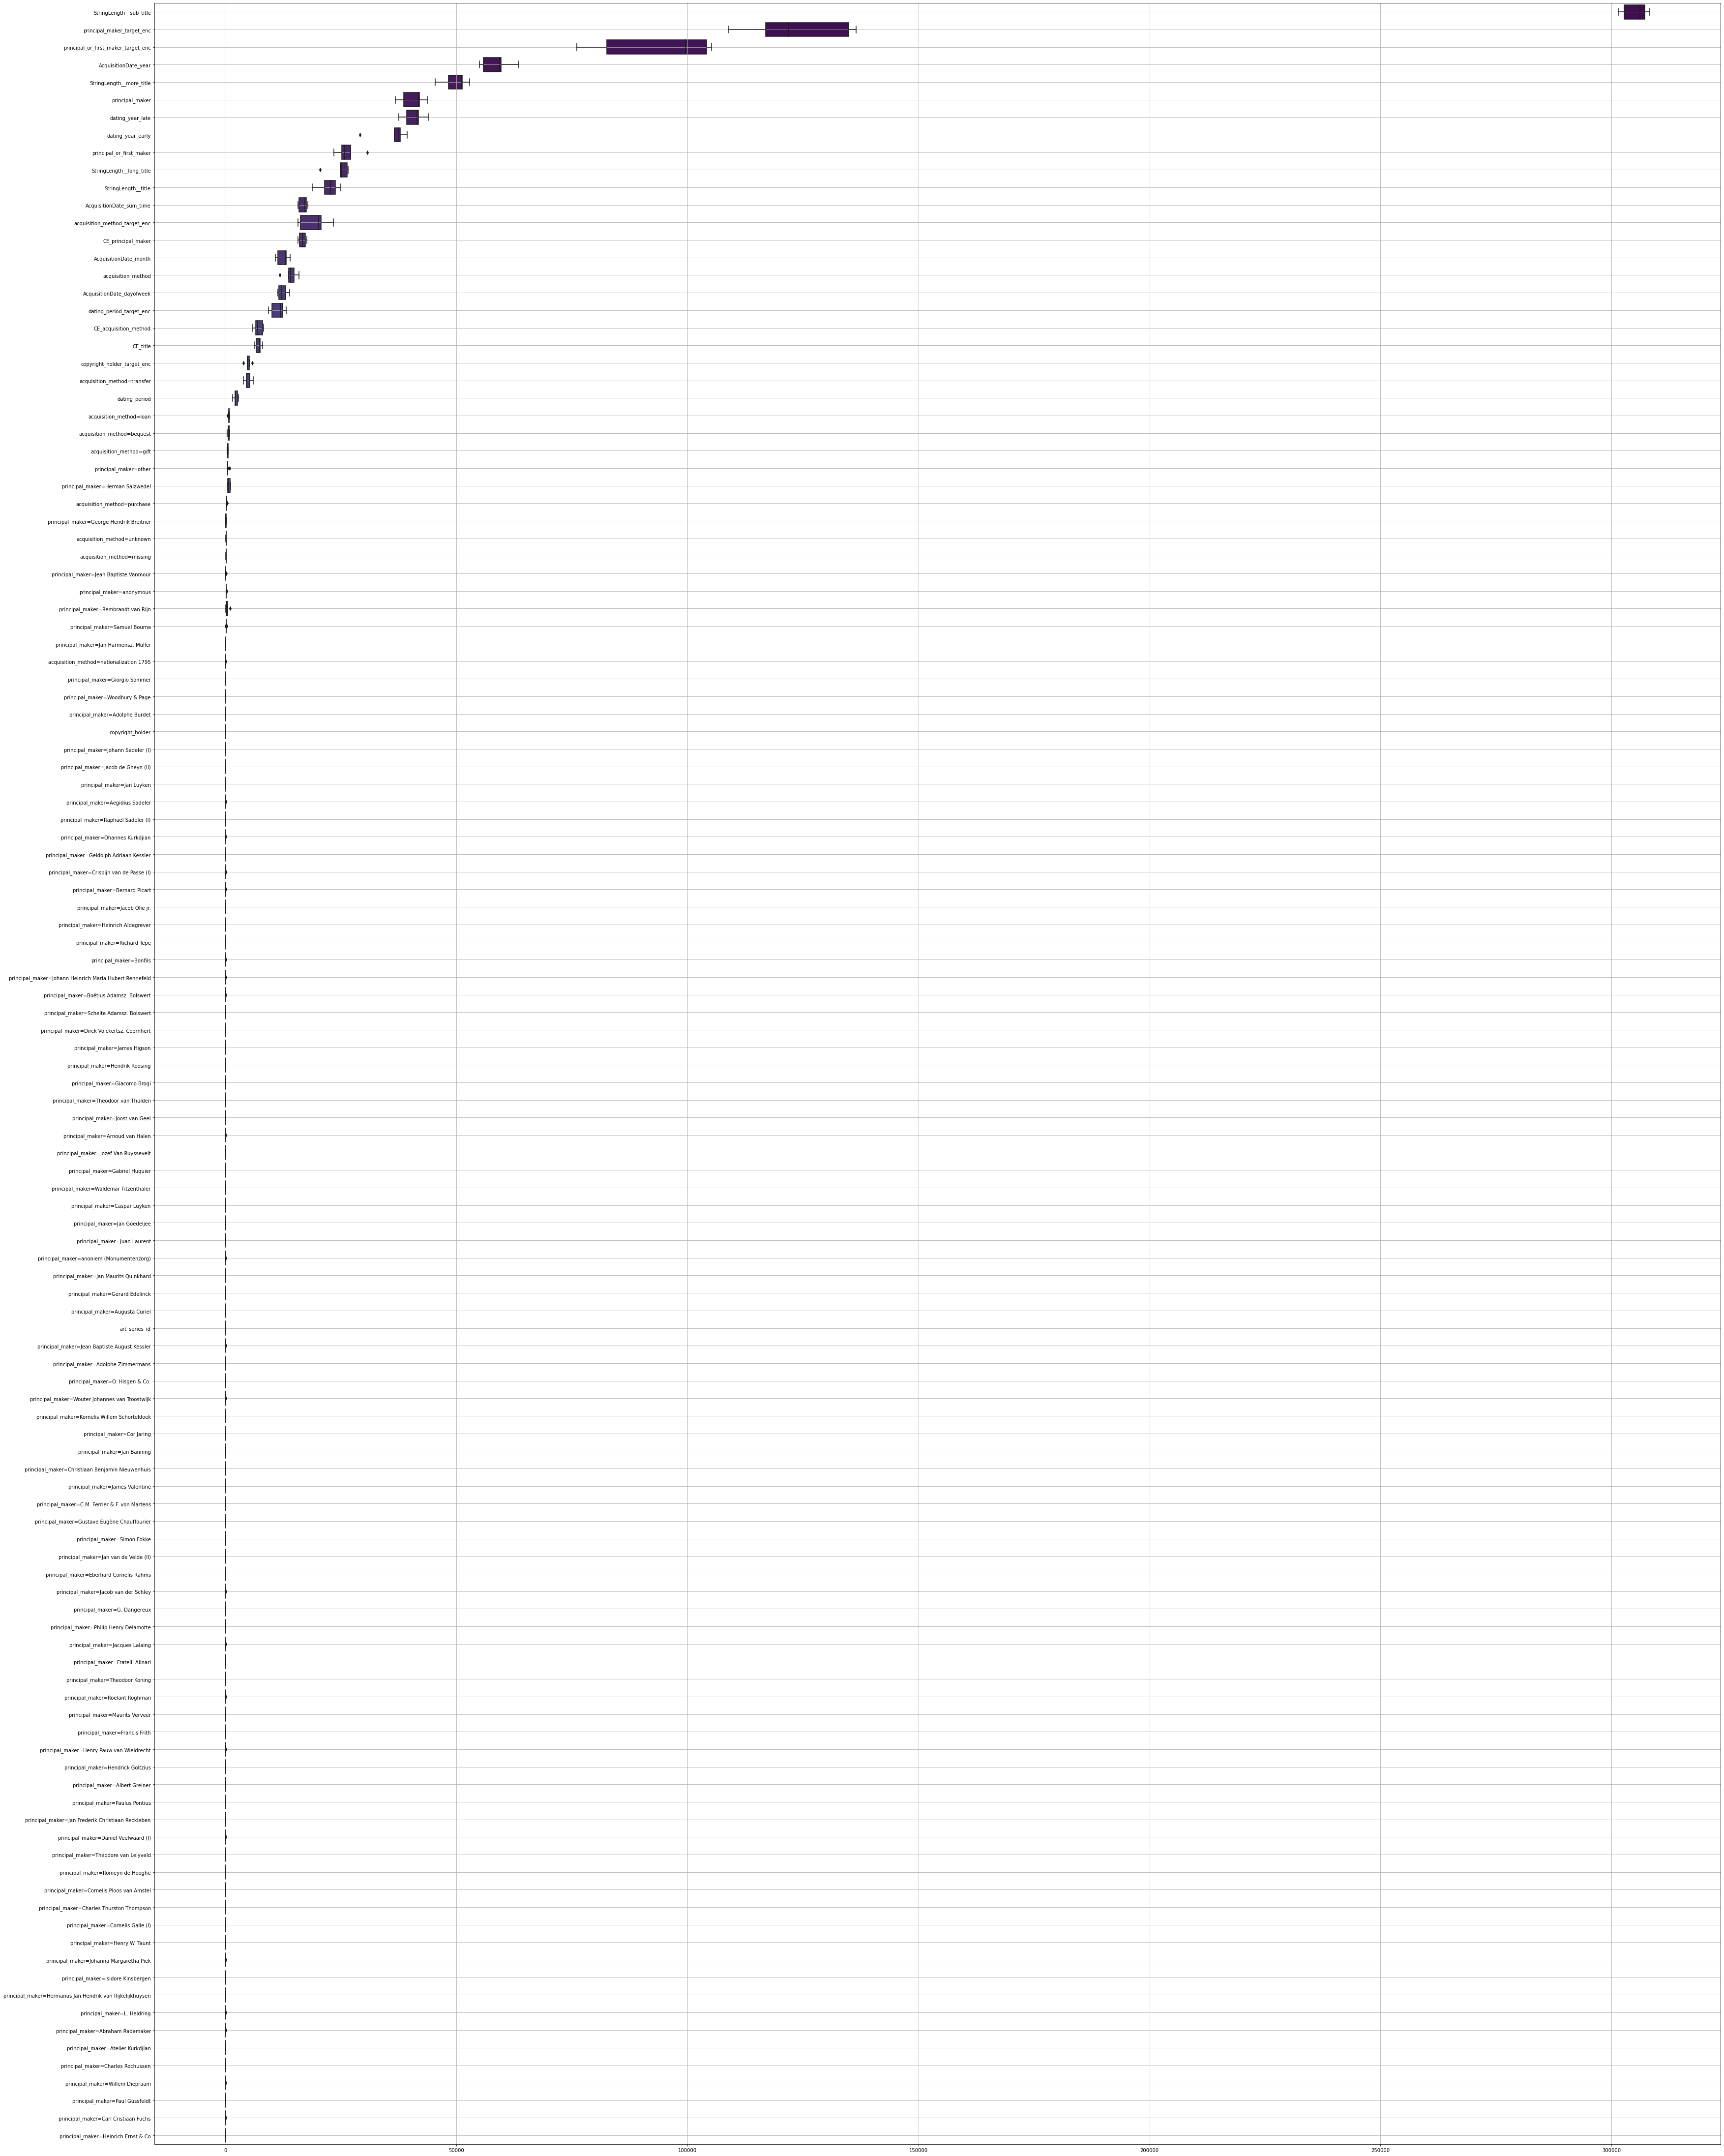

In [38]:
from fe import target_encoding
from lgbm import LGBM

lgbm = LGBM(train=train,
  test=test,
  target='likes',
  use_col=use_col,
  cat_col=cat_col,
  cfg=cfg,
  OUTPUT_DIR=OUTPUT_DIR,
  DO_FIT=True,
  DO_SEED_AVE=False,
  DEBUG=False,
  is_target_log=True)

feature_importance_df, order = lgbm.feature_importance()

In [39]:
from make_data import make_oof
oof_df = make_oof(OUTPUT_DIR=OUTPUT_DIR, TARGET=cfg['target'])

In [40]:
# from score import calc_macro_auc
# score = calc_macro_auc(train_target_df=train_target_df, oof_df=oof_df, order_list=TARGET_IDS)

In [41]:
sample_sub = pd.read_csv('../../data/atmacup10__sample_submission.csv')

In [42]:
from make_data import make_sub
sub_df = make_sub(sample_sub=sample_sub, TARGET_NAME=cfg['target'], TRIAL_NAME=TRIAL_NAME, OUTPUT_DIR=OUTPUT_DIR, cv_score=lgbm.score)

QUick Sub
sh sub.sh output/20210307175537_7_target_encoding/pred/pred_likes_1.1225.csv


In [43]:
sub_df.describe()

,likes
count,12008.000000
mean,20.771462
std,73.185232
min,0.000000
25%,0.943532
50%,2.452495
75%,7.471229
max,2190.488029


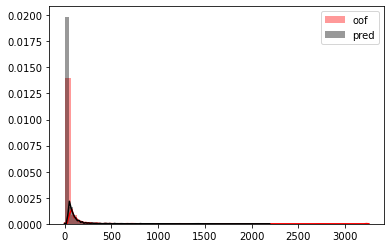

In [44]:
from make_fig import make_dist_oof_pred
make_dist_oof_pred(oof_df=oof_df,sub_df=sub_df,OUTPUT_DIR=OUTPUT_DIR)